<a href="https://colab.research.google.com/github/venkatbabukr/AllProjects/blob/main/Scaler/Modules/Pandas_Buzz_Terms%2C_Nuances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creation and Initialization

## Popular Initialization Methods

Here are the most common and popular ways to create and initialize a pandas DataFrame:

### 1. Initialization from Dictionary Structures

#### 1.1 From a Dictionary (where values are lists/arrays)
*   **Concept:** Keys become column names, and values (typically lists or arrays) become the column data.
*   **Use Case:** Very common when data is structured with clear column headers and their corresponding values.

#### 1.2 From a List of Dictionaries (where each dictionary is a row - JSON format)
*   **Concept:** Each dictionary in the list represents a row, with keys as column names and values as cell data for that row.
*   **Use Case:** Initialize from REST API responses etc...

### 2. Initialization from List Structures

#### 2.1 From a List of Lists (with columns)
*   **Concept:** Each inner list represents a row of data. Column names are provided separately.
*   **Use Case:** Useful when you have row-oriented data and want to explicitly define column labels.

#### 2.2 From a NumPy Array (with columns)
*   **Concept:** Uses a NumPy array as the underlying data structure. Column names are provided separately.
*   **Use Case:** Efficient for numerical data, especially when integrating with existing NumPy workflows.

### 3. Initialization from Plain Texts/Strings

#### 3.1 From a CSV File (or other file formats like Excel)
*   **Concept:** Reads data directly from a file, inferring columns and data types.
*   **Use Case:** A very frequent method for loading external datasets into a DataFrame.

#### 3.2 From String having delimiters using `io.StringIO`
*   **Concept:** Treats a string containing data (e.g., CSV, delimited text) as a file-like object.
*   **Use Case:** Useful for parsing data embedded directly in code or received as a string, avoiding temporary file creation.

### 4. Creating from `series`
*   **Concept:** A single Pandas Series can be directly converted into a DataFrame, where the Series becomes a column (or row, depending on orientation). Multiple Series can also be combined into a DataFrame, with each Series forming a separate column.
*   **Use Case:** Useful when you have data already structured as one or more Pandas Series and you need to combine them or convert a single Series into a DataFrame for further operations (like adding more columns, or using DataFrame-specific methods).

### 5. Creating an Empty DataFrame
*   **Concept:** Initializes a DataFrame with no rows and no columns.
*   **Use Case:** Often used as a starting point to which data will be added iteratively.

### 6. Creating an Empty DataFrame with Specified Columns
*   **Concept:** Initializes a DataFrame with predefined column names but no rows.
*   **Use Case:** Useful when you know the schema beforehand and plan to append data later, ensuring consistent column order and names.

In [1]:
%%writefile data.txt
A B C
1 2 3
4 5 6

Overwriting data.txt


In [2]:
import pandas as pd
import numpy as np
import io
import json # Added import for the json module

print("1. Initialization from Dictionary Structures", end = "\n")

print("1.1 Initializing from a Dictionary (where values are lists/arrays):")
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 28],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df_from_data = pd.DataFrame(data)
print(f"""
data = {data}
df_from_data =
{df_from_data}

{"-" * 30}

""")

print("1.2 Initializing from a List of Dictionaries (JSON format):")
data = [
    {'Name': 'Alice', 'Age': 25, 'City': 'New York'},
    {'Name': 'Bob', 'Age': 30, 'City': 'Los Angeles'},
    {'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'},
    {'Name': 'David', 'Age': 28, 'City': 'Houston'}
]
# 1.2.1: Constructor approach
df_from_data = pd.DataFrame(data)
print(f"""
1.2.1: Constructor approach
data = {data}
df_from_data = df.DataFrame(data) =
{df_from_data}

{"-" * 30}

""")

# 1.2.1: Using read_json method
data_json_str = json.dumps(data) # Convert list data to JSON string
df_from_data = pd.read_json(io.StringIO(data_json_str)) # Changed to convert list to JSON string first
print(f"""
1.2.2: Using pd.read_json
data_json_str = "{data_json_str}"
df_from_data = pd.read_json(io.StringIO(data_json_str)) =
{df_from_data}

{"=" * 30}

""")

print("2. Initialization from List Structures", end = "\n")

print("2.1 Initializing from a List of Lists (with columns):")
data = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 35, 'Chicago'],
    ['David', 28, 'Houston']
]
column_names_list = ['Name', 'Age', 'City']
df_from_data = pd.DataFrame(data, columns=column_names_list)
print(f"""
data = {data}
column_names_list = {column_names_list}
df_from_data =
{df_from_data}

{"-" * 30}

""")

print("2.2 Initializing from a NumPy Array (with columns):")
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
column_names_list = ['ColA', 'ColB', 'ColC']
df_from_data = pd.DataFrame(data, columns=column_names_list)
print(f"""
data = {data}
column_names_list = {column_names_list}
df_from_data =
{df_from_data}

{"=" * 30}

""")

print("3. Initializing from Textual Data", end = "\n")

print("3.1 Initializing from a CSV file:")
# For demonstration, let's create a dummy CSV file in memory using io.StringIO
data = """Col1,Col2,Col3
10,20,30
40,50,60
"""
df_from_data = pd.read_csv(io.StringIO(data))
print(f"""
data = {data}
df_from_data =
{df_from_data}

{"-" * 30}

""")

print("3.2 Initializing from string with delimiters using io.StringIO (like a text file):")
data_file = "data.txt"

df_from_data_file = pd.read_csv(data_file, sep=' ')
print(f"""
data_file = {data_file}
df_from_data_file =
{df_from_data_file}

{"=" * 30}

""")

print("4. Creating from Series")
names_series = pd.Series(['Alice', 'Bob', 'Charlie', 'David'], name='Name')
ages_series = pd.Series([25, 30, 35, 28], name='Age')
scores_series = pd.Series([85.5, 92.0, 78.3, 95.1], name='Score')
is_active_series = pd.Series([True, False, True, True], name='IsActive')
df_from_series = pd.DataFrame()
df_from_series['Name'] = names_series
df_from_series['Age'] = ages_series
df_from_series['Score'] = scores_series
df_from_series['IsActive'] = is_active_series
print(f"""
df_from_series =
{df_from_series}

{"=" * 30}

""")

print("5. Creating an empty DataFrame:")
df_empty = pd.DataFrame()
print(f"""
df_empty =
{df_empty}

{"=" * 30}

""")

print("6. Creating an empty DataFrame with specified columns:")
column_names_list = ['Product', 'Price', 'Quantity']
df_empty_with_cols = pd.DataFrame(columns=column_names_list)
print(f"""
column_names_list = {column_names_list}
df_empty_with_cols =
{df_empty_with_cols}

{"=" * 30}

""")

1. Initialization from Dictionary Structures
1.1 Initializing from a Dictionary (where values are lists/arrays):

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'], 'Age': [25, 30, 35, 28], 'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}
df_from_data =
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   28      Houston

------------------------------


1.2 Initializing from a List of Dictionaries (JSON format):

1.2.1: Constructor approach
data = [{'Name': 'Alice', 'Age': 25, 'City': 'New York'}, {'Name': 'Bob', 'Age': 30, 'City': 'Los Angeles'}, {'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'}, {'Name': 'David', 'Age': 28, 'City': 'Houston'}]
df_from_data = df.DataFrame(data) =
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   28      Houston

------------------------------



1.2.2: Using pd.read_json
data_json_str 

## Other Powerful Initialization Methods
### 1. From a Database Query (e.g., SQL)
*   **Concept:** Directly reads results from a database query into a DataFrame, often using `pd.read_sql()`, `pd.read_sql_table()`, or `pd.read_sql_query()`.
*   **Use Case:** Essential for integrating with relational databases, allowing direct data retrieval without intermediate files.

# Pandas DataFrame Basic Concepts


1. rows: The rows of DataFrame table
2. index: Unique index for each row
3. columns: The columns of DataFrame table.
4. labels: To identify the column by name/label.
5. series: One-dimensional labeled array capable of holding any data type. Each column in a DataFrame is a series.
6. Cell/Value/Element: Actual data point in a row and column combination (DF[row][col])


## Continuing from NumPy realm:

7. Data types (dtype):
8. axis:
9. Broadcasting

## Pictorial representations

### Series + Series = DataFrame

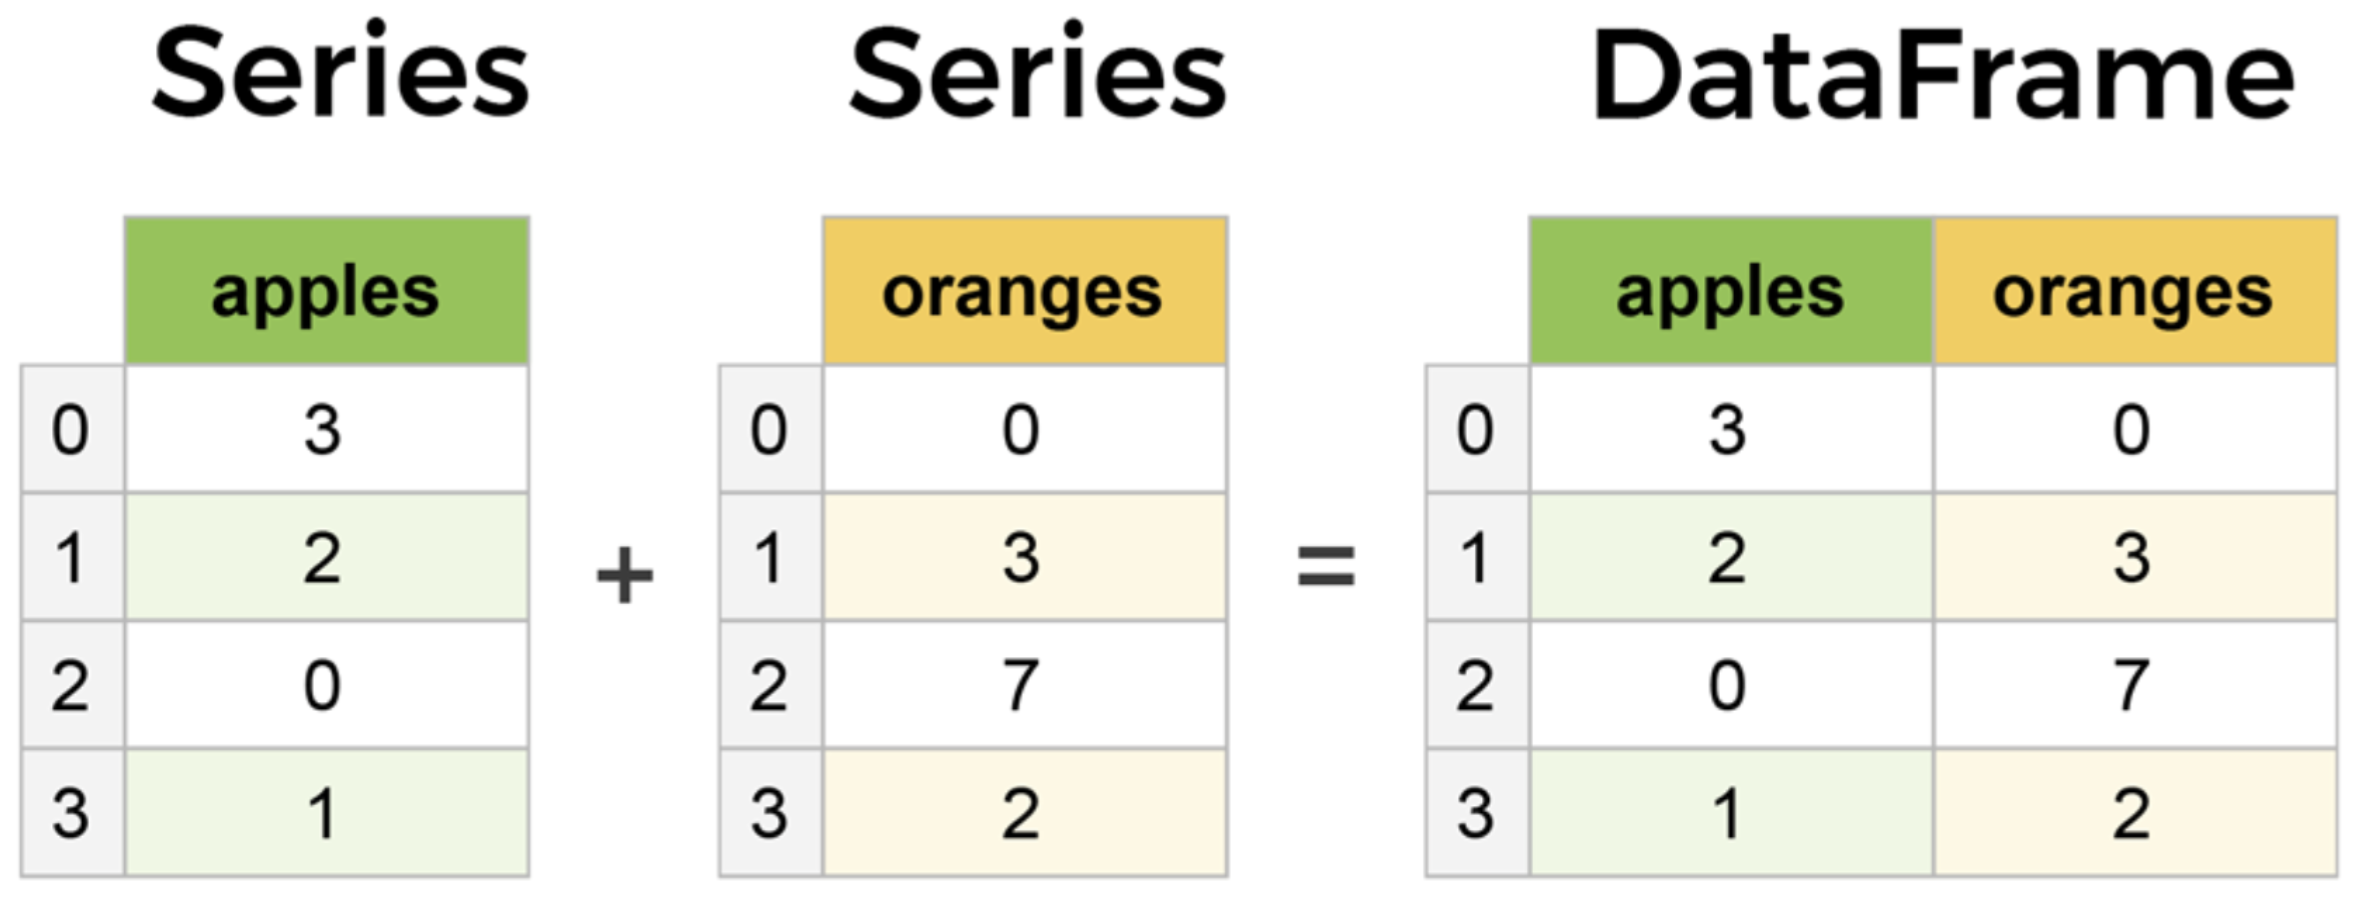

### DataFrame - Rows, Columns, Data

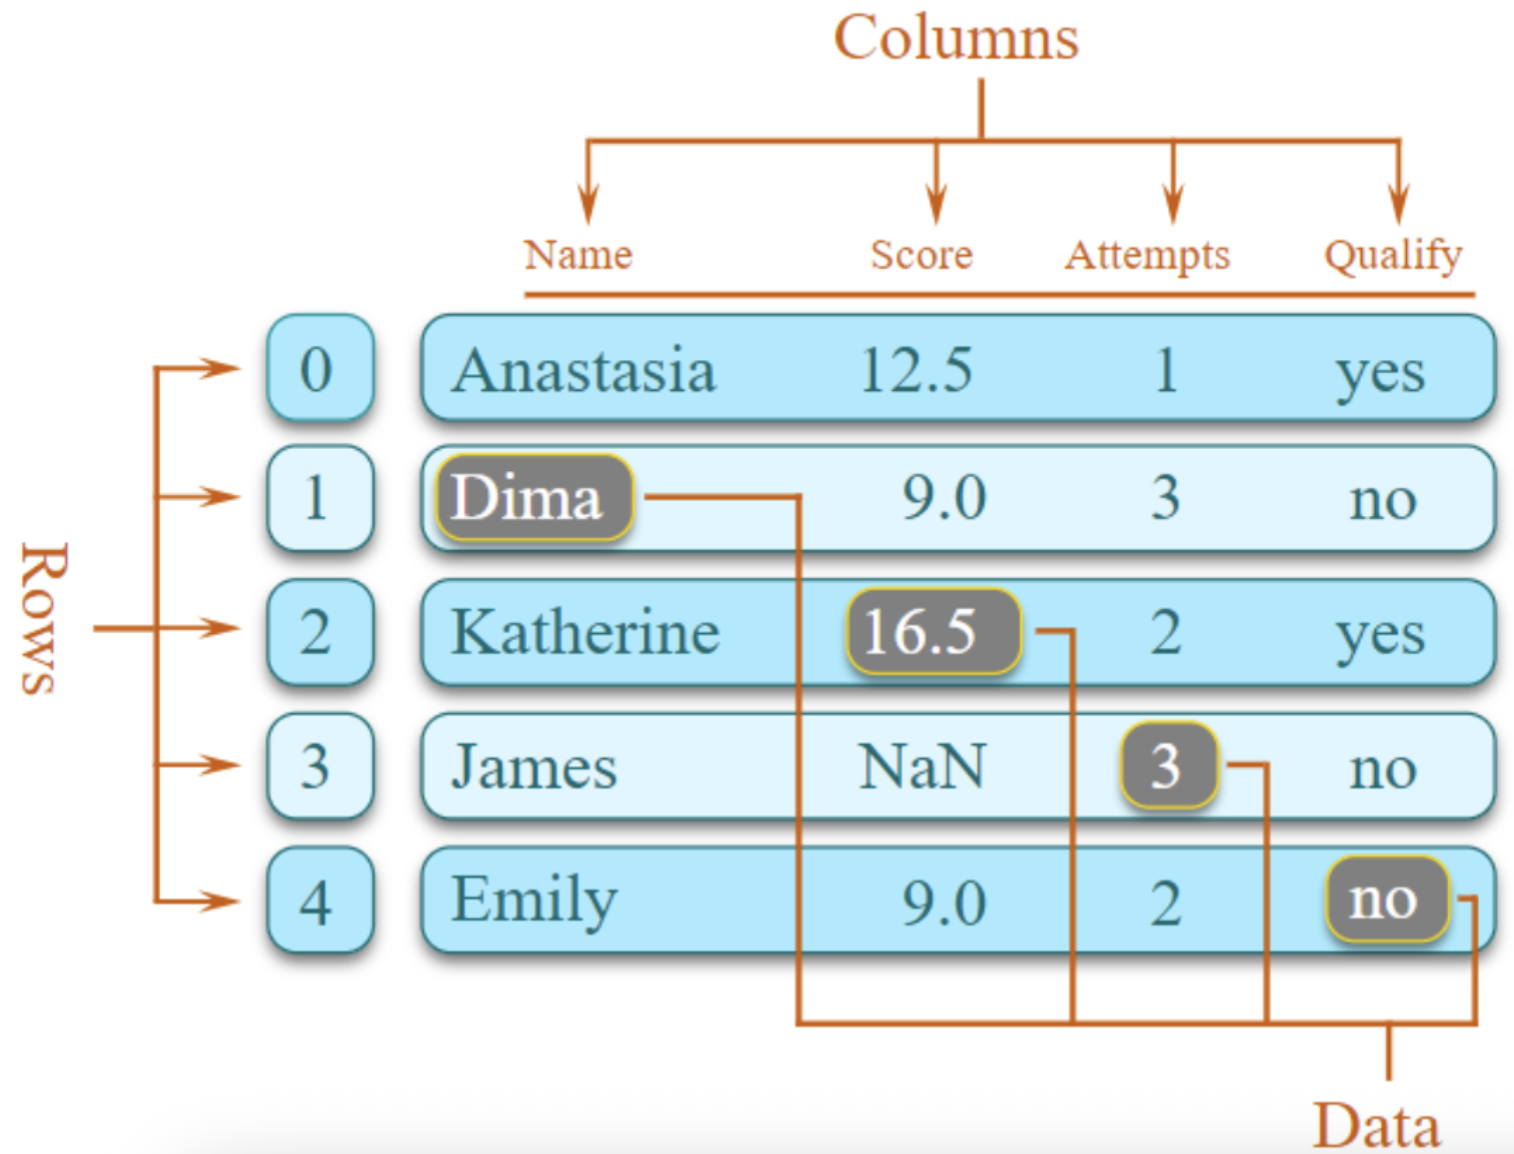

### DataFrame - Rows, Columns, Index, Labels

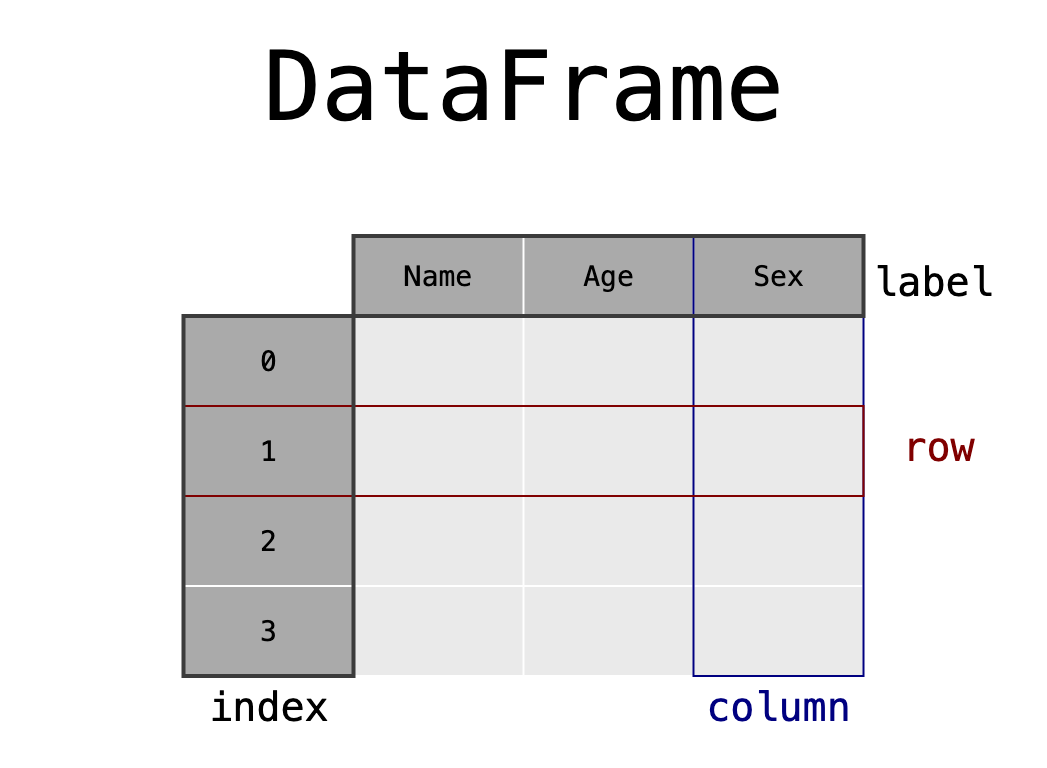

# Data frames Basic Information & Inspection

These operations are crucial for understanding the structure and content of your DataFrame:

### DataFrame Attributes (Structural Properties)

These attributes provide quick access to the fundamental structural information of the DataFrame:

*   `df.shape`: Returns a tuple representing the dimensionality of the DataFrame (rows, columns).
*   `df.columns`: Returns the column labels of the DataFrame as an Index object.
*   `df.index`: Returns the index (row labels) of the DataFrame.
*   `df.dtypes`: Returns a Series with the data type of each column.

### DataFrame Peeking

These operations allow for a rapid glance at the DataFrame's content:

*   `df.head(n=5)`: Views the first `n` (default 5) rows of the DataFrame. Useful for a quick preview of the data.
*   `df.tail(n=5)`: Views the last `n` (default 5) rows of the DataFrame. Useful for checking newly appended data or final entries.

### DataFrame Analysis

*   `df.info(verbose=True, null_counts=True)`: Provides a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage. `verbose=True` shows full summary, `null_counts=True` (deprecated in newer pandas, now part of default `info()` output) explicitly counts non-nulls.

In [3]:
import pandas as pd
import numpy as np

# Create a sample DataFrame for demonstration
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

print("df [Sample DataFrame] =")
display(df)
print("\n" + "="*40 + "\n")

print(f"""1. DataFrame Attributes (Structural Properties):
   - df.shape: {df.shape}
   - df.index: {df.index}
   - df.columns: {df.columns}
   - df.keys(): {df.keys()}
   - df.dtypes:
{df.dtypes}

{"="*40}

""")

print(f"""2. DataFrame Peeking:
df.head(n=3):
{df.head(3)}

df.tail(n=2):
{df.tail(2)}

{"="*40}

""")

print(f"""3. DataFrame Analysis:
df.info(verbose=True) =
""")
df.info(verbose=True)
# print("\n" + "-"*40 + "\n")

df [Sample DataFrame] =


,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M
3,David,28.0,Houston,95,M
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M
6,Grace,27.0,Boston,91,F




1. DataFrame Attributes (Structural Properties):
   - df.shape: (7, 5)
   - df.index: RangeIndex(start=0, stop=7, step=1)
   - df.columns: Index(['Name', 'Age', 'City', 'Score', 'Gender'], dtype='object')
   - df.keys(): Index(['Name', 'Age', 'City', 'Score', 'Gender'], dtype='object')
   - df.dtypes:
Name       object
Age       float64
City       object
Score       int64
Gender     object
dtype: object



2. DataFrame Peeking:
df.head(n=3):
      Name   Age         City  Score Gender
0    Alice  25.0     New York     85      F
1      Bob  30.0  Los Angeles     92      M
2  Charlie   NaN      Chicago     78      M

df.tail(n=2):
    Name   Age     City  Score Gender
5  Frank  40.0  Chicago     70      M
6  Grace  27.0   Boston     91      F



3. DataFrame Analysis:
df.info(verbose=True) =

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    7 non-nul

# DataFrame Indexes & Labels

1.  **Definition**: In Pandas, both DataFrames and Series rely on `Index` objects to provide ordered, immutable sequences that identify and enable efficient access to data.
    *   The **row index** (`df.index`) uniquely identifies each row. By default, this is a `RangeIndex` (integer-based).
    *   The **column index** (`df.columns`) provides labels for each column, often referred to simply as **column names** or **labels**. This is also an `Index` object.
2.  **Purpose of Indexes**: In a Pandas DataFrame, indexes serve as unique identifiers for rows and columns, enabling efficient data access, alignment, and manipulation. They are crucial for distinguishing individual data entries.
3.  **Labels**: The terms **index label** and **column label** refer to the specific identifiers used within the `df.index` and `df.columns` objects, respectively. Column labels are often simply called ***column names***.
4.  **Default Indexing**: When a DataFrame is created without explicitly specifying indexes or columns, Pandas automatically assigns a `RangeIndex` (e.g., `0, 1, 2, ...`) for both rows and, if not named, sequential integers for columns.
5.  **Customizing Indexes and Labels**:
    *   **During Initialization**: You can specify custom row indexes using the `index` parameter and custom column labels using the `columns` parameter when creating a DataFrame (e.g., `pd.DataFrame(data, index=['a', 'b'], columns=['Col1', 'Col2'])`).
    *   **Post-Creation**: Indexes and column labels can be modified after DataFrame creation:
        *   `df.index = new_index_list`: Assigns a new list of labels as the row index.
        *   `df.columns = new_column_list`: Assigns a new list of labels as the column names.
        *   `df.set_index('ColumnName')`: Promotes an existing column to become the new row index.
        *   `df.reset_index()`: Converts the current row index back into a regular column and assigns a default `RangeIndex`.
            *   See [detailed documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to understand it's complete internal working details!
6.  **Types of Indexes**: Use the index type that is most suitable for the data structure and analytical needs.
    *    `RangeIndex`: is common and the fundamental type of index
    *    `DatetimeIndex`: is for time-series data
    *    `MultiIndex`: is for hierarchical indexing
    *    `CategoricalIndex`
7.  **Importance of Uniqueness**: For most DataFrame operations (especially alignment and lookup), it's highly recommended that both row and column indexes contain unique labels. Non-unique indexes can lead to unexpected behavior in some operations.



In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(8).reshape(2, 4))
print(f"""1. Creating dataframe with default row & column indexes
df = pd.DataFrame(np.arange(8).reshape(2, 4))=
""")
display(df)
print(f"""
df.index = {df.index}
df.columns = {df.columns}

{"="*40}

""")


df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
    index=['cobra', 'viper', 'sidewinder'],
    columns=['max_speed', 'shield'])
print(f"""2. Creating dataframe with explicit labels - index label as well as column label
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
    index=['cobra', 'viper', 'sidewinder'],
    columns=['max_speed', 'shield'])
""")
display(df)
print(f"""
df.index = {df.index}
df.columns = {df.columns}

{"-"*40}

""")

print("df.loc['viper':'sidewinder', 'max_speed']=")
display(df.loc['viper':'sidewinder', 'max_speed'])
print("\n" + "-"*40 + "\n")
print(f"""df.loc['sidewinder':'cobra', 'max_speed']=
Displays no data because forward traversal from index 'sidewinder' to 'cobra' is empty!
""")
display(df.loc['sidewinder':'cobra', 'max_speed'])
print("\n" + "-"*40 + "\n")
print(f"df.loc['sidewinder':'cobra':-1, 'max_speed']=")
display(df.loc['sidewinder':'cobra':-1, 'max_speed'])
print("\n" + "="*40 + "\n")

print("3. Changing labels")
print("3.1 Changing column labels/column names")
df.columns = ['max_speed_new', 'shield_new']
display(df)
print("\n" + "-"*40 + "\n")
print("3.2 Changing row labels/index labels")
df.index = ['cobra_new', 'viper_new', 'sidewinder_new']
display(df)
print("\n" + "="*40 + "\n")
print(f"""4. Promoting column to an index
df.set_index('max_speed_new', inplace=True)=
""")
df.set_index('max_speed_new', inplace=True)
display(df)
print("\n" + "="*40 + "\n")
print(f"""5. Resetting index
df.reset_index(drop=True, inplace=True) =
Note: Here, max_speed column is completely lost!
""")
df.reset_index(drop=True, inplace=True)
display(df)
print("\n" + "="*40 + "\n")

1. Creating dataframe with default row & column indexes
df = pd.DataFrame(np.arange(8).reshape(2, 4))=



,0,1,2,3
0,0,1,2,3
1,4,5,6,7



df.index = RangeIndex(start=0, stop=2, step=1)
df.columns = RangeIndex(start=0, stop=4, step=1)



2. Creating dataframe with explicit labels - index label as well as column label
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
    index=['cobra', 'viper', 'sidewinder'],
    columns=['max_speed', 'shield'])



,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8



df.index = Index(['cobra', 'viper', 'sidewinder'], dtype='object')
df.columns = Index(['max_speed', 'shield'], dtype='object')

----------------------------------------


df.loc['viper':'sidewinder', 'max_speed']=


,max_speed
viper,4
sidewinder,7



----------------------------------------

df.loc['sidewinder':'cobra', 'max_speed']=
Displays no data because forward traversal from index 'sidewinder' to 'cobra' is empty!



,max_speed



----------------------------------------

df.loc['sidewinder':'cobra':-1, 'max_speed']=


,max_speed
sidewinder,7
viper,4
cobra,1




3. Changing labels
3.1 Changing column labels/column names


,max_speed_new,shield_new
cobra,1,2
viper,4,5
sidewinder,7,8



----------------------------------------

3.2 Changing row labels/index labels


,max_speed_new,shield_new
cobra_new,1,2
viper_new,4,5
sidewinder_new,7,8




4. Promoting column to an index
df.set_index('max_speed_new', inplace=True)=



,shield_new
max_speed_new,
1,2
4,5
7,8




5. Resetting index
df.reset_index(drop=True, inplace=True) =
Note: Here, max_speed column is completely lost!



,shield_new
0,2
1,5
2,8


# Other important DDL functions

## df.rename()
Use this to rename any label - row index label or column label

## df.drop()
Use this to drop row or column

In [5]:
import pandas as pd

df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
    index=['cobra', 'viper', 'sidewinder'],
    columns=['max_speed', 'shield'])

# Renaming examples
print("1. Renaming examples")
# print(f"""1. Renaming row index
# df.rename(index={
# """)
print("1.1 Renaming row indices")

print("df.rename({'cobra': 'cobra_renamed'}) =")
display(df.rename({'cobra': 'cobra_renamed'}))
print("\n" + "-"*40 + "\n")
print("df.rename(index={'viper': 'vip_renamed'}) =")
display(df.rename(index={'viper': 'vip_renamed'}))
print("\n" + "-"*40 + "\n")
print("df.rename({'viper': 'vip_renamed'}, axis = 0) =")
display(df.rename({'viper': 'vip_renamed'}, axis = 0))
print("\n" + "-"*40 + "\n")

print("1.2 Renaming column labels")
print("df.rename({'shield': 'shield_renamed'}, axis = 1) =")
display(df.rename({'shield': 'shield_renamed'}, axis = 1))
print("\n" + "-"*40 + "\n")
print("df.rename(columns = {'max_speed': 'max_speed_renamed'}) =")
display(df.rename(columns = {'max_speed': 'max_speed_renamed'}))
print("\n" + "="*40 + "\n")

# Dropping examples
print("2. Dropping examples")

print("2.1 Dropping rows")
print("df.drop(['cobra', 'sidewinder']) =")
display(df.drop(['cobra', 'sidewinder']))
print("\n" + "-"*40 + "\n")

print("2.2 Dropping columns")
print("df.drop(['max_speed'], axis = 1) =")
display(df.drop(['max_speed'], axis = 1))
print("\n" + "-"*40 + "\n")
print("df.drop(columns=['shield']) =")
display(df.drop(columns=['shield']))
# print("\n" + "="*40 + "\n")

1. Renaming examples
1.1 Renaming row indices
df.rename({'cobra': 'cobra_renamed'}) =


,max_speed,shield
cobra_renamed,1,2
viper,4,5
sidewinder,7,8



----------------------------------------

df.rename(index={'viper': 'vip_renamed'}) =


,max_speed,shield
cobra,1,2
vip_renamed,4,5
sidewinder,7,8



----------------------------------------

df.rename({'viper': 'vip_renamed'}, axis = 0) =


,max_speed,shield
cobra,1,2
vip_renamed,4,5
sidewinder,7,8



----------------------------------------

1.2 Renaming column labels
df.rename({'shield': 'shield_renamed'}, axis = 1) =


,max_speed,shield_renamed
cobra,1,2
viper,4,5
sidewinder,7,8



----------------------------------------

df.rename(columns = {'max_speed': 'max_speed_renamed'}) =


,max_speed_renamed,shield
cobra,1,2
viper,4,5
sidewinder,7,8




2. Dropping examples
2.1 Dropping rows
df.drop(['cobra', 'sidewinder']) =


,max_speed,shield
viper,4,5



----------------------------------------

2.2 Dropping columns
df.drop(['max_speed'], axis = 1) =


,shield
cobra,2
viper,5
sidewinder,8



----------------------------------------

df.drop(columns=['shield']) =


,max_speed
cobra,1
viper,4
sidewinder,7


# EDA (Exploratory Data Analytics) functions

WRite about .unique(), .nunique(), .value_count() etc...

### df.describe()

`df.describe(percentiles=None, include=None, exclude=None)`

Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. By default, it works for numerical columns. `include='all'` can be used to include object type columns, `include=['object']` for only object columns, and `exclude` to omit certain types. `percentiles` allows specifying custom percentiles.

In [6]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

print("\ndf.describe(include='all') = ")
display(df.describe(include='all'))



df.describe(include='all') = 


,Name,Age,City,Score,Gender
count,7,6.000000,7,7.000000,7
unique,7,NaN,6,NaN,2
top,Alice,NaN,Chicago,NaN,M
freq,1,NaN,2,NaN,4
mean,NaN,30.333333,NaN,85.571429,NaN
std,NaN,5.316641,NaN,8.810167,NaN
min,NaN,25.000000,NaN,70.000000,NaN
25%,NaN,27.250000,NaN,81.500000,NaN
50%,NaN,29.000000,NaN,88.000000,NaN
75%,NaN,31.500000,NaN,91.500000,NaN


# The Versatile Square Brackets `[]`

One of the most fundamental and powerful tools in Pandas for interacting with DataFrames and Series. They provide a concise and flexible way to perform both **data selection (indexing)** and **data assignment (modification)**.

## Core Functionality:

### 1. Data Selection and Indexing

When used for selection, `[]` allows you to retrieve specific subsets of data from your DataFrame.

#### 1.1 Column Selection
*   `df['ColumnLabel']`: Selects a **single column** by its label. The result is a Pandas **Series**.
*   `df[['ColumnLabel1', 'ColumnLabel2']]`: Selects **multiple columns** by providing a list of labels. The result is a **DataFrame**.

#### 1.2 Row Selection
*   **Boolean Indexing:** `df[boolean_series]` performs conditional selection. It filters rows based on a Series of `True`/`False` values, where only rows corresponding to `True` are returned. (e.g., `df[df['Age'] > 30]`)
*   **Slicing:** `df[start:end:[step]]` performs slicing of rows by implicit integer position. Similar to Python list slicing, the `end` position is *exclusive*. (e.g., `df[0:5]` selects rows from index 0 up to, but not including, 5).
*   **Fancy Indexing:** Supported using `df.loc` and `df.iloc` properties. Use `df.loc[list(row indexes)]` or `df.iloc[list(row integer indexes)]` for explicit position-based selection.

#### 1.3 Selecting rows and columns together
Use `df.loc[<Row selection>, <Column/Columns list>]]` or `df.iloc[list(row integer indexes), <Column/Columns list>]]` to select both rows and columns together.

### 2. Data Assignment and Modification

Use on LHS of an assignment to create new columns or modify existing ones.

*   **Creating New Columns:** If the specified column label does not exist, a new column is created with the provided values.
    *   `df['NewColumn'] = value_or_series`: Assigns a new column filled with a scalar value or a Series aligned by index.
*   **Modifying Existing Columns:** If the column label already exists, its values are updated.
    *   `df['ExistingColumn'] = new_values`: Updates all values in the 'ExistingColumn' with `new_values`.

## Views vs. Copies (NumPy Connection):

Pandas often relies on NumPy's internal memory management. When you select data using `[]`, it can sometimes return a *view* of the original DataFrame's data rather than a *copy*. This implies modifying the view could inadvertently modify the original DataFrame. For explicit copies, it's best practice to use the `.copy()` method (e.g., `df_subset = df[df['Age'] > 30].copy()`).

In [7]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

# Column selections using []
print(f"""1.1 Selecting a single column
df['Name'] =
""")
display(df['Name'])
print("\n" + "-"*40 + "\n")

print(f"""1.1 Selecting multiple columns
df[['Name', 'City']] =
""")
display(df[['Name', 'City']])
print("\n" + "="*40 + "\n")

# Row selection using []
print(f"""1.2 Boolean indexing
df[df['Age'] > 30] =
""")
display(df[df['Age'] > 30])
print("\n" + "-"*40 + "\n")

print(f"""1.2 Slicing rows
df[0:3] =
""")
display(df[0:3])
print("\n" + "-"*40 + "\n")

print(f"""1.2 Row fancy indexing using loc
df.loc[[0, 2, 4]] =
""")
display(df.loc[[0, 2, 4]])
print("\n" + "="*40 + "\n")

print(f"""1.3 Selecting rows and columns together
Splicing using df.loc - df.loc[0:2, ['Name', 'City']] =
""")
display(df.loc[0:2, ['Name', 'City']])
print("\n" + "-"*40 + "\n")

print(f"""1.3 Selecting rows and columns together
Boolean indexing using loc - df.loc[df['Score'] > 80, ['Name', 'Age', 'Score']] =
""")
display(df.loc[df['Score'] > 80, ['Name', 'Age', 'Score']])
print("\n" + "="*40 + "\n")

print(f"""2.1 Data modification - Create new column
df['Score_Percentage'] = df['Score'] / 100 =
""")
df['Score_Percentage'] = df['Score'] / 100
display(df)
print("\n" + "-"*40 + "\n")

print(f"""2.2 Data modification - Modify existing column
df['Age'] = df['Age'] + 5 =
""")
df['Age'] = df['Age'] + 5
display(df)
print("\n" + "="*40 + "\n")

1.1 Selecting a single column
df['Name'] =



,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve
5,Frank
6,Grace



----------------------------------------

1.1 Selecting multiple columns
df[['Name', 'City']] =



,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago
3,David,Houston
4,Eve,Miami
5,Frank,Chicago
6,Grace,Boston




1.2 Boolean indexing
df[df['Age'] > 30] =



,Name,Age,City,Score,Gender
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M



----------------------------------------

1.2 Slicing rows
df[0:3] =



,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M



----------------------------------------

1.2 Row fancy indexing using loc
df.loc[[0, 2, 4]] =



,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
2,Charlie,NaN,Chicago,78,M
4,Eve,32.0,Miami,88,F




1.3 Selecting rows and columns together
Splicing using df.loc - df.loc[0:2, ['Name', 'City']] =



,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago



----------------------------------------

1.3 Selecting rows and columns together
Boolean indexing using loc - df.loc[df['Score'] > 80, ['Name', 'Age', 'Score']] =



,Name,Age,Score
0,Alice,25.0,85
1,Bob,30.0,92
3,David,28.0,95
4,Eve,32.0,88
6,Grace,27.0,91




2.1 Data modification - Create new column
df['Score_Percentage'] = df['Score'] / 100 =



,Name,Age,City,Score,Gender,Score_Percentage
0,Alice,25.0,New York,85,F,0.85
1,Bob,30.0,Los Angeles,92,M,0.92
2,Charlie,NaN,Chicago,78,M,0.78
3,David,28.0,Houston,95,M,0.95
4,Eve,32.0,Miami,88,F,0.88
5,Frank,40.0,Chicago,70,M,0.70
6,Grace,27.0,Boston,91,F,0.91



----------------------------------------

2.2 Data modification - Modify existing column
df['Age'] = df['Age'] + 5 =



,Name,Age,City,Score,Gender,Score_Percentage
0,Alice,30.0,New York,85,F,0.85
1,Bob,35.0,Los Angeles,92,M,0.92
2,Charlie,NaN,Chicago,78,M,0.78
3,David,33.0,Houston,95,M,0.95
4,Eve,37.0,Miami,88,F,0.88
5,Frank,45.0,Chicago,70,M,0.70
6,Grace,32.0,Boston,91,F,0.91


### `.loc[]` - _LocIndexer

The `.loc[]` accessor is primarily **label-based accessor**, meaning you use the actual values of the index or column names to make selections.

*   **Selecting a Single Row:** Pass a single index label.
    *   `df.loc['RowLabel']`
*   **Selecting Multiple Rows:** Pass a list of index labels.
    *   `df.loc[['RowLabel1', 'RowLabel2']]`
*   **Select by slicing:** Use slice notation with labels. Note that with `.loc[]`, the end label in a slice *is* inclusive.
    *   `df.loc['StartIndexLabel':'EndIndexLabel', 'StartColumnLabel':'EndColumnLabel']`
*   **Selecting Rows and Columns by Label:** Combine row and column labels/lists/slices.
    *   `df.loc['RowLabel', 'ColumnLabel']`
    *   `df.loc[['RowLabel1', 'RowLabel2'], ['ColumnLabel1', 'ColumnLabel2']]`

In [8]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)
display(df)
print(f"df.loc = {df.loc}")
print("\n" + "="*40 + "\n")

print(f"""Splicing both rows & columns using .loc
df.loc[1:2,'Age':'Score'] =
""")
display(df.loc[1:2,'Age':'Score'])

,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M
3,David,28.0,Houston,95,M
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M
6,Grace,27.0,Boston,91,F


df.loc = <pandas.core.indexing._LocIndexer object at 0x7fd08e974500>


Splicing both rows & columns using .loc
df.loc[1:2,'Age':'Score'] =



,Age,City,Score
1,30.0,Los Angeles,92
2,NaN,Chicago,78



### `.iloc[]` - _iLocIndexer

The `.iloc[]` is same as `.loc[]` from all perspectives with an exception that `.iloc[]` is an **integer-based accessor**, meaning you use the **integer position (0-based) of the rows and columns** to make selections.

All the four methods of selection supported by `.loc[]` are also supported by `.iloc[]` with certain caveats:

*    When doing slicing in `iloc[]`, the end is *excluded* as iloc slicing works on implicit python-style indices

In [9]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
print("Original data frame")
df = pd.DataFrame(data)
display(df)
print(f"df.iloc = {df.iloc}")
print("\n" + "="*40 + "\n")

print(f"""Splicing rows and columns together using iloc
df.iloc[0:4, 0:3] =
""")
display(df.iloc[0:4, 0:3])
# print("\n" + "-"*40 + "\n")

Original data frame


,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M
3,David,28.0,Houston,95,M
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M
6,Grace,27.0,Boston,91,F


df.iloc = <pandas.core.indexing._iLocIndexer object at 0x7fd08e975180>


Splicing rows and columns together using iloc
df.iloc[0:4, 0:3] =



,Name,Age,City
0,Alice,25.0,New York
1,Bob,30.0,Los Angeles
2,Charlie,NaN,Chicago
3,David,28.0,Houston


### Slicing Internals

In the previous section, we saw `df.loc[1:2,'Age':'Score']` and `df.iloc[0:4, 0:3]`. How does slicing actually work in Pandas?

*   **Label-based Slicing (`.loc`)**: When you slice using labels (e.g., `df.loc['start_label':'end_label']`), Pandas identifies the rows (or columns) corresponding to these labels. Critically, **the 'end_label' is inclusive**. If 'start_label' appears after 'end_label' in the index, an empty result will be returned unless a step (e.g., `-1`) is provided to indicate reverse traversal.

*   **Integer-position Slicing (`.iloc`)**: When you slice using integer positions (e.g., `df.iloc[start_pos:end_pos]`), Pandas selects rows (or columns) based on their 0-based numerical position. Similar to standard Python list slicing, **the 'end_pos' is exclusive**.

*   **Mechanism**: Pandas (leveraging NumPy internally) efficiently determines the contiguous block of data corresponding to the specified slice. It does not literally "iterate" through each element to find memory locations. Instead, it uses its index to map labels/positions to internal data arrays and extracts the relevant segment.

*   **Empty Results**: If the slice range does not encompass any valid data points (e.g., `start_label` is after `end_label` without a reverse step, or `start_pos` >= `end_pos`), an empty Series or DataFrame will be returned.

Go through all code examples below that result in empty results to better understand the internal working of slicing!

In [10]:
import pandas as pd
import numpy as np

# See all examples below that result in empty results to get understanding on how slicing works!

data = {
    'Name': ['Bob', 'Alice', 'Grace', 'Charlie', 'David', 'Frank', 'Eve'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)
df.set_index('Name', inplace=True)
display(df)
print("\n" + "="*40 + "\n")

print("Empty results during row slicing:")
print("df.loc['David':'Alice'] =")
display(df.loc['David':'Alice'])
print("\n" + "-"*40 + "\n")
print("df.loc['Alice':'Bob'] =")
display(df.loc['Alice':'Bob'])
print("\n" + "="*40 + "\n")

print("Empty results during column slicing:")
print("Only names get displayed as name is the index!")
print("df.loc[:, 'Age':'City'] =")
display(df.loc[:, 'Age':'City'])
print("\n" + "-"*40 + "\n")
print("df.loc[:, 'Gender':'City'] =")
display(df.loc[:, 'Gender':'City'])
# print("\n" + "="*40 + "\n")

,City,Age,Score,Gender
Name,,,,
Bob,New York,25.0,85,F
Alice,Los Angeles,30.0,92,M
Grace,Chicago,NaN,78,M
Charlie,Houston,28.0,95,M
David,Miami,32.0,88,F
Frank,Chicago,40.0,70,M
Eve,Boston,27.0,91,F




Empty results during row slicing:
df.loc['David':'Alice'] =


,City,Age,Score,Gender
Name,,,,



----------------------------------------

df.loc['Alice':'Bob'] =


,City,Age,Score,Gender
Name,,,,




Empty results during column slicing:
Only names get displayed as name is the index!
df.loc[:, 'Age':'City'] =


""
Name
Bob
Alice
Grace
Charlie
David
Frank
Eve



----------------------------------------

df.loc[:, 'Gender':'City'] =


""
Name
Bob
Alice
Grace
Charlie
David
Frank
Eve


# MultiIndexing

## Creating Hierarchical Indexes

In [11]:
import pandas as pd

multi_index1 = pd.MultiIndex.from_tuples(
    [
        ("bird", "falcon"),
        ("bird", "parrot"),
        ("mammal", "lion"),
        ("mammal", "monkey"),
    ],
    names=["class", "name"],
)
df = pd.DataFrame(
    [389.0, 24.0, 80.5, np.nan],
    index=multi_index1,
    columns=["max_speed"]
)
print("Hierarchical multi index sample 1 with two levels - class & name")
display(df)
print("\n" + "="*40 + "\n")

print("Hierarchical multi index sample 2 with two columns promoted as indexes")
data = {
    'Region': ['North', 'North', 'South', 'South', 'East'],
    'City': ['Delhi', 'Mumbai', 'Chennai', 'Bangalore', 'Kolkata'],
    'Sales': [100, 150, 80, 120, 90],
    'Profit': [10, 15, 8, 12, 9]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)
print("-" * 30)

# Set 'Region' and 'City' as a multi-index
df_multiindex = df.set_index(['Region', 'City'])

print("After df.set_index(['Region', 'City'])")
display(df_multiindex)
print(df_multiindex.index)

Hierarchical multi index sample 1 with two levels - class & name


max_speed
class  name             
bird   falcon      389.0
       parrot       24.0
mammal lion         80.5
       monkey        NaN



Hierarchical multi index sample 2 with two columns promoted as indexes
Original DataFrame:


,Region,City,Sales,Profit
0,North,Delhi,100,10
1,North,Mumbai,150,15
2,South,Chennai,80,8
3,South,Bangalore,120,12
4,East,Kolkata,90,9


------------------------------
After df.set_index(['Region', 'City'])


Sales  Profit
Region City                    
North  Delhi        100      10
       Mumbai       150      15
South  Chennai       80       8
       Bangalore    120      12
East   Kolkata       90       9

MultiIndex([('North',     'Delhi'),
            ('North',    'Mumbai'),
            ('South',   'Chennai'),
            ('South', 'Bangalore'),
            ( 'East',   'Kolkata')],
           names=['Region', 'City'])


## Selecting from Hierchacial Indexes

In [12]:
import pandas as pd

multi_index1 = pd.MultiIndex.from_tuples(
    [
        ("bird", "falcon"),
        ("bird", "parrot"),
        ("mammal", "lion"),
        ("mammal", "monkey"),
    ],
    names=["class", "name"],
)
df = pd.DataFrame(
    [389.0, 24.0, 80.5, np.nan],
    index=multi_index1,
    columns=["max_speed"]
)

print("Only bird class = df.loc[\"bird\"] = ")
display(df.loc["bird"])
print("\n" + "-"*40 + "\n")
print(f"""Select only falcon, using df.xs
df.xs('falcon', level='name')=
""")
display(df.xs('falcon', level='name'))
print("\n" + "="*40 + "\n")

Only bird class = df.loc["bird"] = 


,max_speed
name,
falcon,389.0
parrot,24.0



----------------------------------------

Select only falcon, using df.xs
df.xs('falcon', level='name')=



,max_speed
class,
bird,389.0


## Using Versatile `[]`

We can use the versatile square braces `[]` even with hierarchical multi-indexes. Follow the steps outlined below:

1. Create `idx = pd.IndexSlice` object
2. Create index views using `idx[...]`
3. Finally get results from data frame using `df.loc[idx[...]]`

> Note: If you wish to perform slicing also here, you need to ensure that the indexes are all sorted. Otherwise we get `UnsortedIndexError`!

See code examples below:

In [13]:
import pandas as pd

data = {
    'Region': ['North', 'North', 'North', 'South', 'South', 'East'],
    'City': ['Delhi', 'Mumbai', 'Bhopal', 'Chennai', 'Bangalore', 'Kolkata'],
    'Sales': [100, 150, 125, 80, 120, 90],
    'Profit': [10, 15, 4, 8, 12, 9]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)
print("\n" + "-"*40 + "\n")

# Set 'Region' and 'City' as a multi-index
df_multiindex = df.set_index(['Region', 'City'])
print("Indexed DataFrame copy:")
display(df_multiindex)
print("\n" + "-"*40 + "\n")

# 1. Initialize the IndexSlice object
print("idx = pd.IndexSlice", end="\n")
idx = pd.IndexSlice
# 2. Use the idx and loc to get results now
print("df_multiindex.loc[idx[:,'Delhi'], :]=")
display(df_multiindex.loc[idx[:,'Delhi'], :])
print("\n" + "-"*40 + "\n")
# Sort the indexes now
df_multiindex.sort_index(inplace=True)
print("After df_multiindex.sort_index(inplace=True)")
display(df_multiindex)
print("\n" + "-"*40 + "\n")
print("df_multiindex.loc[idx[:,'Bangalore':'Delhi'], 'Sales']")
display(df_multiindex.loc[idx[:,'Bangalore':'Delhi'], 'Sales'])

Original DataFrame:


,Region,City,Sales,Profit
0,North,Delhi,100,10
1,North,Mumbai,150,15
2,North,Bhopal,125,4
3,South,Chennai,80,8
4,South,Bangalore,120,12
5,East,Kolkata,90,9



----------------------------------------

Indexed DataFrame copy:


Sales  Profit
Region City                    
North  Delhi        100      10
       Mumbai       150      15
       Bhopal       125       4
South  Chennai       80       8
       Bangalore    120      12
East   Kolkata       90       9


----------------------------------------

idx = pd.IndexSlice
df_multiindex.loc[idx[:,'Delhi'], :]=


,,Sales,Profit
Region,City,,
North,Delhi,100,10



----------------------------------------

After df_multiindex.sort_index(inplace=True)


Sales  Profit
Region City                    
East   Kolkata       90       9
North  Bhopal       125       4
       Delhi        100      10
       Mumbai       150      15
South  Bangalore    120      12
       Chennai       80       8


----------------------------------------

df_multiindex.loc[idx[:,'Bangalore':'Delhi'], 'Sales']


Region  City     
North   Bhopal       125
        Delhi        100
South   Bangalore    120
        Chennai       80
Name: Sales, dtype: int64